<a href="https://colab.research.google.com/github/vienskaz/ECG-CNN/blob/main/EKG_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.utils import to_categorical
from scipy.signal import butter,filtfilt
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import classification_report

In [12]:
syntetic_twos = np.loadtxt('/content/drive/MyDrive/ecg/twos.csv', delimiter=',')
syntetic_fours = np.loadtxt('/content/drive/MyDrive/ecg/fours.csv', delimiter=',')

In [ ]:
print(len(syntetic_fours))

4359


In [13]:
mit_test_data = pd.read_csv('/content/drive/MyDrive/ecg/mitbih_test.csv', header=None)
mit_train_data = pd.read_csv('/content/drive/MyDrive/ecg/mitbih_train.csv', header=None)

X_train = mit_train_data.iloc[:, :-1].values
y_train = mit_train_data.iloc[:, -1].values
X_test = mit_test_data.iloc[:, :-1].values
y_test = mit_test_data.iloc[:, -1].values

normal = pd.read_csv('/content/drive/MyDrive/ecg/ptbdb_normal.csv', header=None)
abnormal = pd.read_csv('/content/drive/MyDrive/ecg/ptbdb_abnormal.csv', header=None)
X_normal = normal.iloc[:, :-1].values
y_normal = np.zeros(X_normal.shape[0])
X_abnormal = abnormal.iloc[:, :-1].values
y_abnormal = np.ones(X_abnormal.shape[0])

X = np.concatenate([X_normal, X_abnormal], axis=0)
y = np.concatenate([y_normal, y_abnormal], axis=0)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X = X.reshape((X.shape[0], X.shape[1], 1))

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [21]:
one = np.array([])
one_label = np.array([])
three = np.array([])
three_label = np.array([])
five = np.array([])
five_label = np.array([])


while one.shape[0] < 5000 or three.shape[0] < 5000 or five.shape[0] < 5000:
    for i in range(len(Y_train)):
        if np.array_equal(Y_train[i], [1.0, 0.0, 0.0, 0.0, 0.0]):
            if one.shape[0] < 5000:
                one = np.concatenate([one, [X_train[i]]]) if one.shape[0] > 0 else np.array([X_train[i]])
                one_label = np.concatenate([one_label, [[1.0, 0.0, 0.0, 0.0, 0.0]]]) if one_label.shape[0] > 0 else np.array([[1.0, 0.0, 0.0, 0.0, 0.0]])

        elif np.array_equal(Y_train[i], [0.0, 0.0, 1.0, 0.0, 0.0]):
            if three.shape[0] < 5000:
                three = np.concatenate([three, [X_train[i]]]) if three.shape[0] > 0 else np.array([X_train[i]])
                three_label = np.concatenate([three_label, [[0.0, 0.0, 1.0, 0.0, 0.0]]]) if three_label.shape[0] > 0 else np.array([[0.0, 0.0, 1.0, 0.0, 0.0]])

        elif np.array_equal(Y_train[i], [0.0, 0.0, 0.0, 0.0, 1.0]):
            if five.shape[0] < 5000:
                five = np.concatenate([five, [X_train[i]]]) if five.shape[0] > 0 else np.array([X_train[i]])
                five_label = np.concatenate([five_label, [[0.0, 0.0, 0.0, 0.0, 1.0]]]) if five_label.shape[0] > 0 else np.array([[0.0, 0.0, 0.0, 0.0, 1.0]])




In [22]:
print("train", X_train.shape)
print("train", Y_train.shape)
print("one: ", one_label.shape)
print("one: ", one.shape)
print("three: ", three_label.shape)
print("three: ", three.shape)
print("five: ", five_label.shape)
print("five: ", five.shape)

train (87554, 187, 1)
train (87554, 5)
one:  (5000, 5)
one:  (5000, 187, 1)
three:  (5000, 5)
three:  (5000, 187, 1)
five:  (5000, 5)
five:  (5000, 187, 1)


In [23]:
two = np.array([])
four = np.array([])




for i in range(len(Y_train)):
    if np.array_equal(Y_train[i], [0.0, 1.0, 0.0, 0.0, 0.0]):
          two = np.concatenate([two, [X_train[i]]]) if two.shape[0] > 0 else np.array([X_train[i]])


    elif np.array_equal(Y_train[i], [0.0, 0.0, 0.0, 1.0, 0.0]):
        four = np.concatenate([four, [X_train[i]]]) if four.shape[0] > 0 else np.array([X_train[i]])


In [17]:
print("two: ", two.shape)
print("four: ", four.shape)

two:  (2223, 187, 1)
four:  (641, 187, 1)


In [24]:
def moving_average_filter(signal, window_size=5):
    filtered=[]
    for data in signal:
      filtered_ecg = np.convolve(data.flatten(), np.ones(window_size) / window_size, mode='same')
      filtered.append(filtered_ecg)
    return np.array(filtered)


In [25]:
one = np.squeeze(one, axis=-1)
two = np.squeeze(two, axis=-1)
three=np.squeeze(three, axis=-1)
four = np.squeeze(four, axis=-1)
five = np.squeeze(five, axis=-1)


one= moving_average_filter(one)
two= moving_average_filter(two)
three= moving_average_filter(three)
four= moving_average_filter(four)
five= moving_average_filter(five)

merged_two = np.concatenate((two, syntetic_twos), axis=0)
merged_four = np.concatenate((four, syntetic_fours), axis=0)


In [ ]:
print(merged_two.shape)
print(merged_four.shape)

(5000, 187)
(5000, 187)


In [31]:
X_train_f = np.concatenate((one, merged_two, three, merged_four, five))

In [32]:
X_train.shape

(25000, 187)

In [33]:
two_label = np.array([0.0, 1.0, 0.0, 0.0, 0.0])

repetitions=5000

result_two_label = np.tile(two_label, (repetitions, 1))

four_label = np.array([0.0, 0.0, 0.0, 1.0, 0.0])


result_four_label = np.tile(four_label, (repetitions, 1))

print(result_four_label.shape)
print(result_two_label.shape)

(5000, 5)
(5000, 5)


In [34]:
Y_train = np.concatenate((one_label, result_two_label, three_label, result_four_label, five_label))

In [35]:
Y_train.shape

(25000, 5)

In [ ]:
def butter_lowpass(cutoff=60, fs=125, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff=60, fs=125, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    filtered=[]
    for signal in data:
      y = lfilter(b, a, signal)
      filtered.append(y)
    return filtered

In [ ]:
print(len(Y_train))

25000


In [36]:
X_test_f=moving_average_filter(X_test)

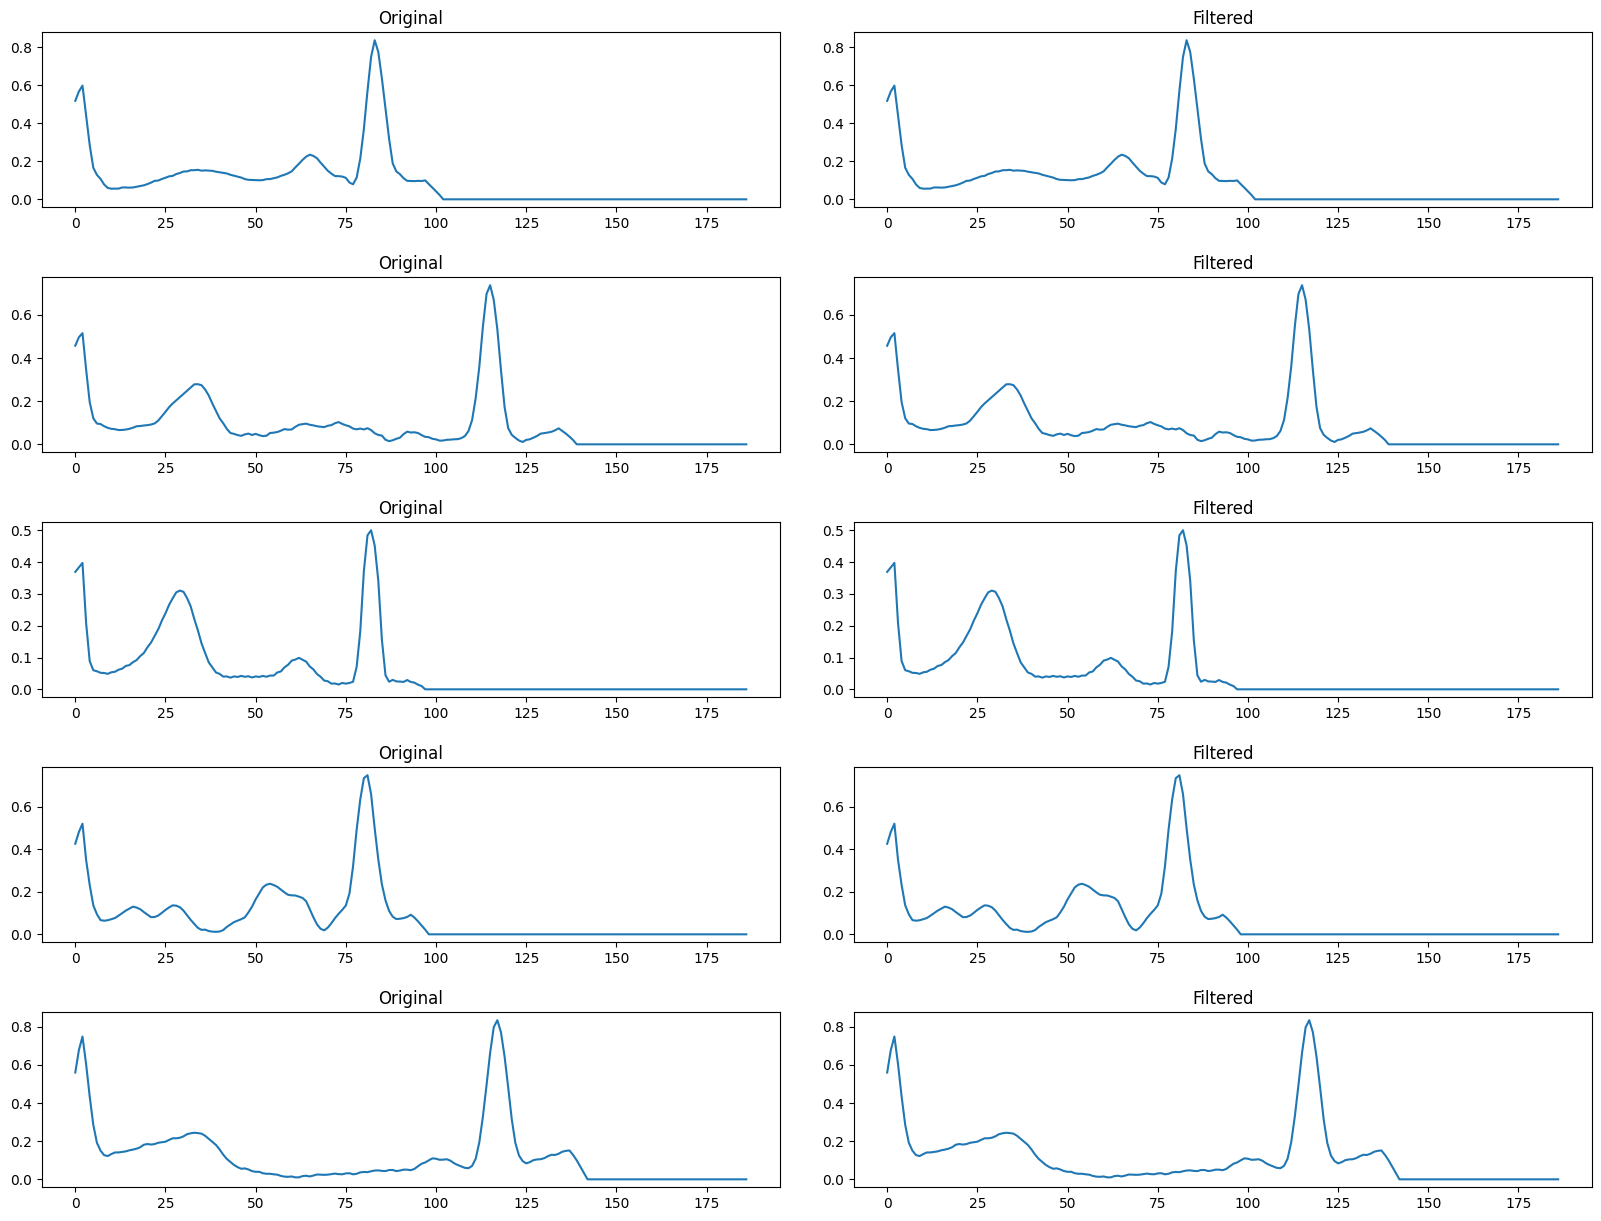

In [37]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.4)
for i in range(5):
    plt.subplot(5, 2, 2 * i + 1)
    plt.title("Original")
    plt.plot(X_train[i])

    plt.subplot(5, 2, 2 * i + 2)
    plt.title("Filtered")
    plt.plot(X_train_f[i])
plt.show()


In [38]:
model = models.Sequential()

model.add(layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=(187,1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 183, 32)           192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 91, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 87, 64)            10304     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 43, 64)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 2752)              0         
                                                                 
 dense (Dense)               (None, 128)               3

In [39]:
batch_size=20
history = model.fit(X_train_f, Y_train, epochs=10,batch_size=batch_size,shuffle=True,)


Epoch 1/10
1250/1250 [==============================] - 15s 5ms/step - loss: 0.3969 - accuracy: 0.8608
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2209 - accuracy: 0.9266
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1682 - accuracy: 0.9424
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.1361 - accuracy: 0.9532
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1166 - accuracy: 0.9605
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1000 - accuracy: 0.9648
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0861 - accuracy: 0.9693
Epoch 8/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0747 - accuracy: 0.9732
Epoch 9/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0671 - accuracy: 0.9767
Epoch 10/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.05

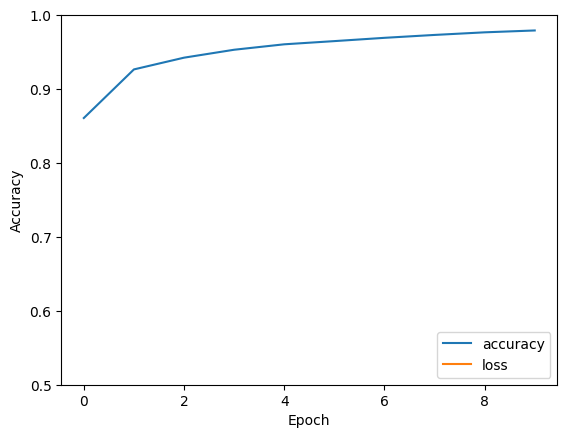

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [41]:
loss, accuracy=model.evaluate(X_test_f,Y_test)
print(f'Loss={loss}')
print(f'{accuracy * 100:.2f}%')

685/685 [==============================] - 3s 4ms/step - loss: 0.1480 - accuracy: 0.9578
Loss=0.14796602725982666
95.78%


685/685 [==============================] - 3s 5ms/step
Confusion Matrix:
tf.Tensor(
[[17458   323   182    56    99]
 [   95   443    14     0     4]
 [   55     8  1354    15    16]
 [   21     0    18   123     0]
 [    9     3     6     0  1590]], shape=(5, 5), dtype=int32)


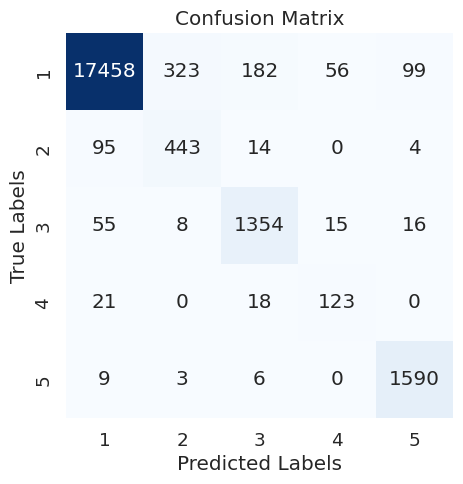

In [43]:
y_pred = model.predict(X_test_f)
y_pred_classes = tf.argmax(y_pred, axis=1)


y_test = y_test.astype(int)


confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes, num_classes=5)
print("Confusion Matrix:")
print(confusion_matrix)


plt.figure(figsize=(5, 5))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=[1, 2, 3, 4, 5])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=[1, 2, 3, 4, 5])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [44]:
y_test_modified_labels = y_test + 1
y_pred_classes_modified_labels = y_pred_classes + 1


classification_rep = classification_report(y_test_modified_labels, y_pred_classes_modified_labels, labels=[1, 2, 3, 4, 5])
print(classification_rep)

              precision    recall  f1-score   support

           1       0.99      0.96      0.98     18118
           2       0.57      0.80      0.66       556
           3       0.86      0.94      0.90      1448
           4       0.63      0.76      0.69       162
           5       0.93      0.99      0.96      1608

    accuracy                           0.96     21892
   macro avg       0.80      0.89      0.84     21892
weighted avg       0.96      0.96      0.96     21892



In [45]:
sensitivity_per_class = confusion_matrix.numpy().diagonal() / confusion_matrix.numpy().sum(axis=1)
for i, sensitivity in enumerate(sensitivity_per_class, start=1):
    print(f"Class {i} Sensitivity: {sensitivity:.4f}")

Class 1 Sensitivity: 0.9636
Class 2 Sensitivity: 0.7968
Class 3 Sensitivity: 0.9351
Class 4 Sensitivity: 0.7593
Class 5 Sensitivity: 0.9888
